**Task 1**

**Predictive Modeling**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [ ]:
df = pd.read_csv(r'/content/Dataset .csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Build a regression model to predict the aggregate rating of a restaurant based on available features.Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.get_dummies(df, columns=["Has Table booking", "Has Online delivery"], drop_first=True)

In [ ]:
x = df[["Average Cost for two", "Votes", "Price range", "Has Table booking_Yes", "Has Online delivery_Yes"]]
y = df["Aggregate rating"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model : Linear Regression")
print("Mean Square Error (MSE) : ", mse)
print("R-squared (R2) Score", r2)

Model : Linear Regression
Mean Square Error (MSE) :  1.6764802747031442
R-squared (R2) Score 0.2634446409021949


**Experiment with different algorithms(e.g., linear regression, decision trees, random forest) and compare their performance.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {"MSE" : mse, "R2 Score" : r2}

results_df = pd.DataFrame(results)
print(results_df)

          Linear Regression  Decision Tree  Random Forest
MSE                1.676480       0.203498       0.133938
R2 Score           0.263445       0.910594       0.941155


**Task 2**

**Customer Preference Analysis**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [ ]:
df = pd.read_csv(r'/content/Dataset .csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Analyze the relationship between the type of cuisine and the restaurant's rating.**

In [ ]:
cuisines = df["Cuisines"]

In [ ]:
cuisines.value_counts().head(10)

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


In [ ]:
top_10_cuisines = cuisines.value_counts().head(10).index

In [ ]:
cuisine_ratings = pd.DataFrame({"cuisine" : cuisines, "Rating" : df["Aggregate rating"]})

In [ ]:
cuisine_ratings_top_10 = cuisine_ratings[cuisine_ratings["cuisine"].isin(top_10_cuisines)]

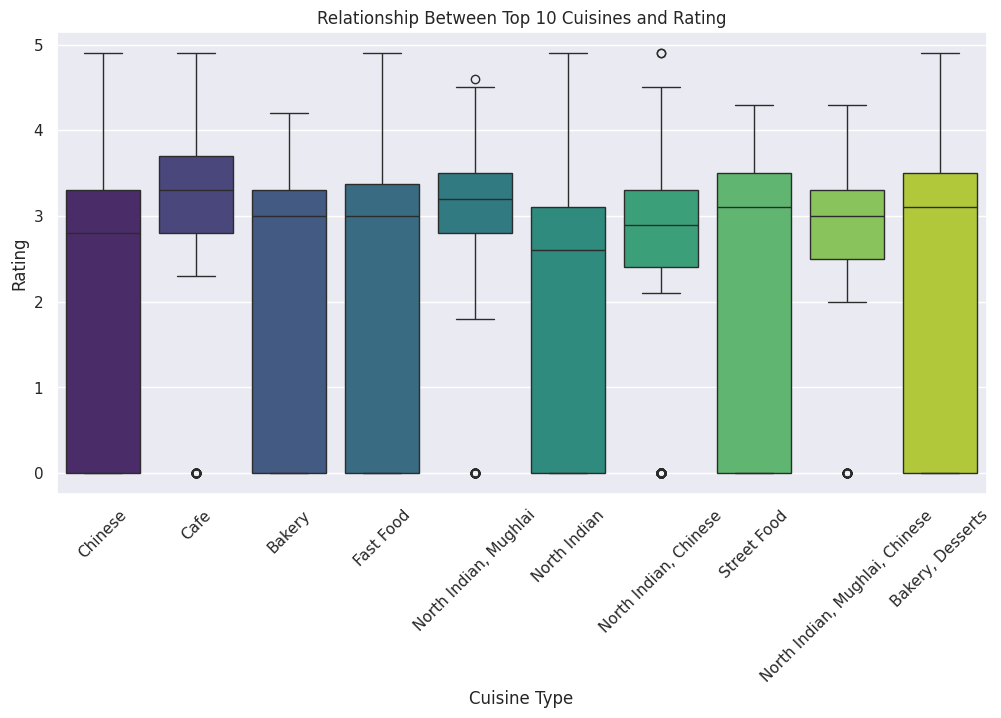

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="cuisine", y="Rating", data=cuisine_ratings_top_10, palette = "viridis")
plt.title("Relationship Between Top 10 Cuisines and Rating")
plt.xlabel("Cuisine Type")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

**Identify the most popular cuisines among customers based on the number of votes.**

In [ ]:
cuisine_votes = pd.DataFrame({"Cuisine" : cuisines, "Votes" : df["Votes"]})

In [ ]:
cuisine_votes_sum = cuisine_votes.groupby("Cuisine")["Votes"].sum()

In [ ]:
popular_cuisines = cuisine_votes_sum.sort_values(ascending=False)

In [ ]:
print("Top 10 Most Popular Cuisines Based on Number of Votes : ")
print(popular_cuisines.head(10))

Top 10 Most Popular Cuisines Based on Number of Votes : 
Cuisine
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


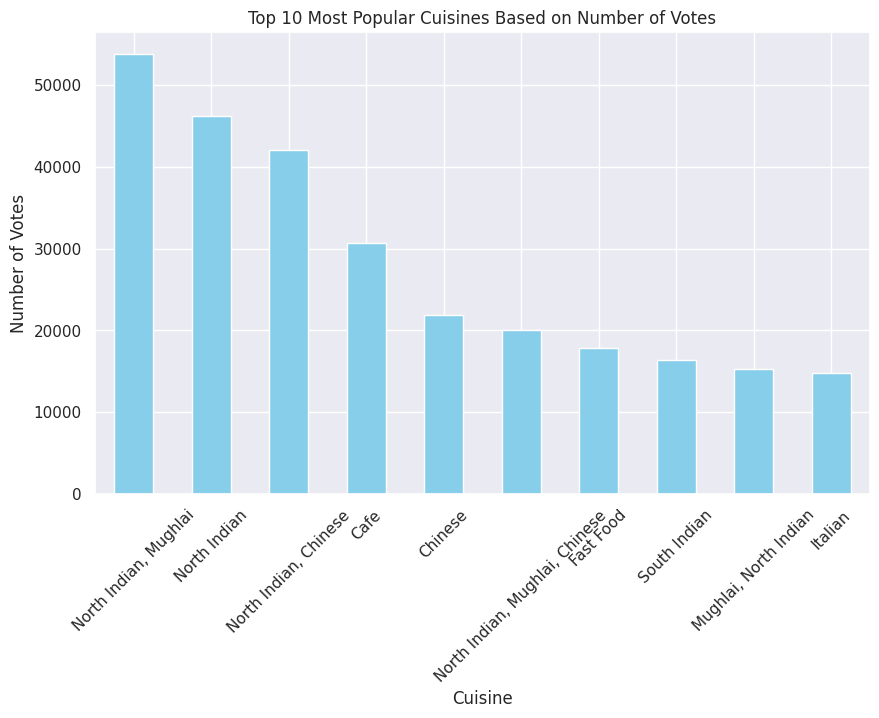

In [ ]:
plt.figure(figsize=(10, 6))
popular_cuisines.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Popular Cuisines Based on Number of Votes")
plt.xlabel("Cuisine")
plt.ylabel("Number of Votes")
plt.xticks(rotation=45)
plt.show()

**Determine if there are any specific cuisines that tend to receive higher ratings.**

In [ ]:
cuisine_ratings = pd.DataFrame({"Cuisines" : cuisines, "Rating" : df["Aggregate rating"]})

In [ ]:
np.average_rating_by_cuisine = cuisine_ratings.groupby("Cuisine")["Rating"]

Column 'Cuisine' not found. Available columns are: Index(['Cuisines', 'Rating'], dtype='object')


**Create visualization to represent the distribution of ratings using different charts(histogram, bar plot, etc.)**

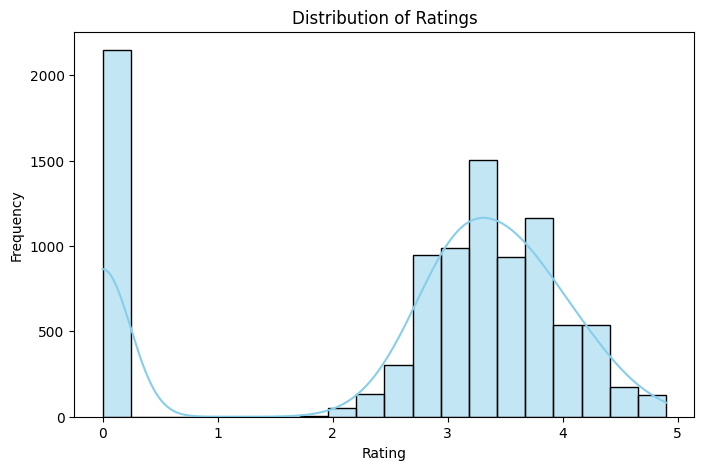

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv(r'/content/Dataset .csv')
plt.figure(figsize=(8, 5))
sns.histplot(df1["Aggregate rating"], bins= 20, kde=True, color= "skyblue")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3201883569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Aggregate rating", data=df1, palette="cividis")


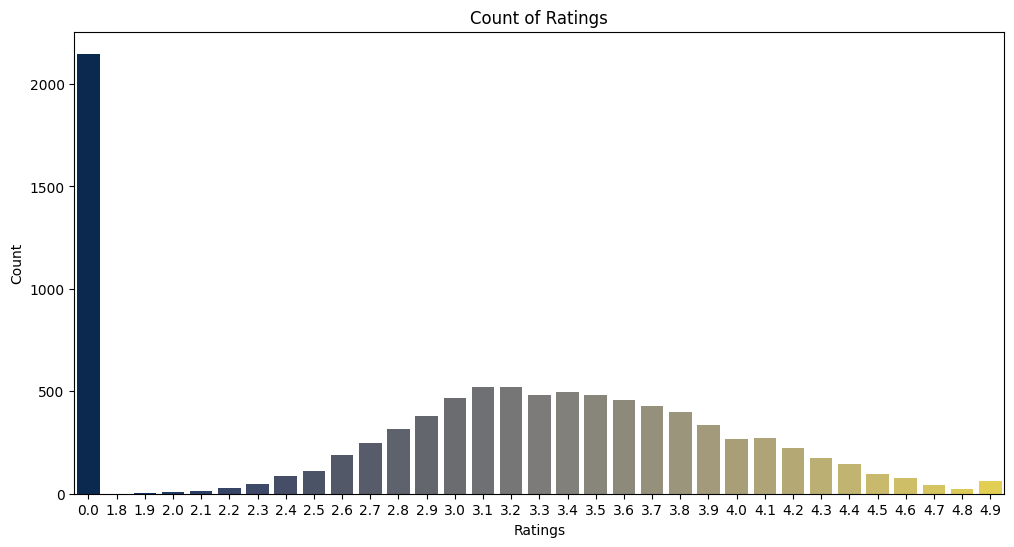

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Aggregate rating", data=df1, palette="cividis")
plt.title("Count of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

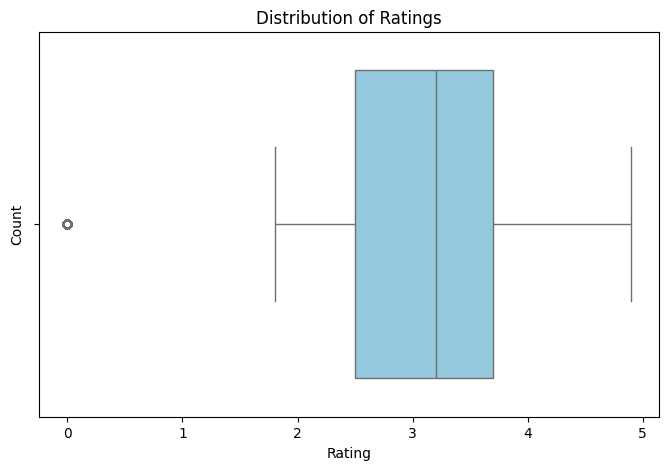

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Aggregate rating", data=df1, color="skyblue")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**Compare the average ratings of different cuisines or cities using appropriate visualizations.**

In [7]:
average_rating_by_city = df1.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)

/tmp/ipython-input-3473008040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_city.head(10).index, y=average_rating_by_city.head(10).values, palette="viridis")


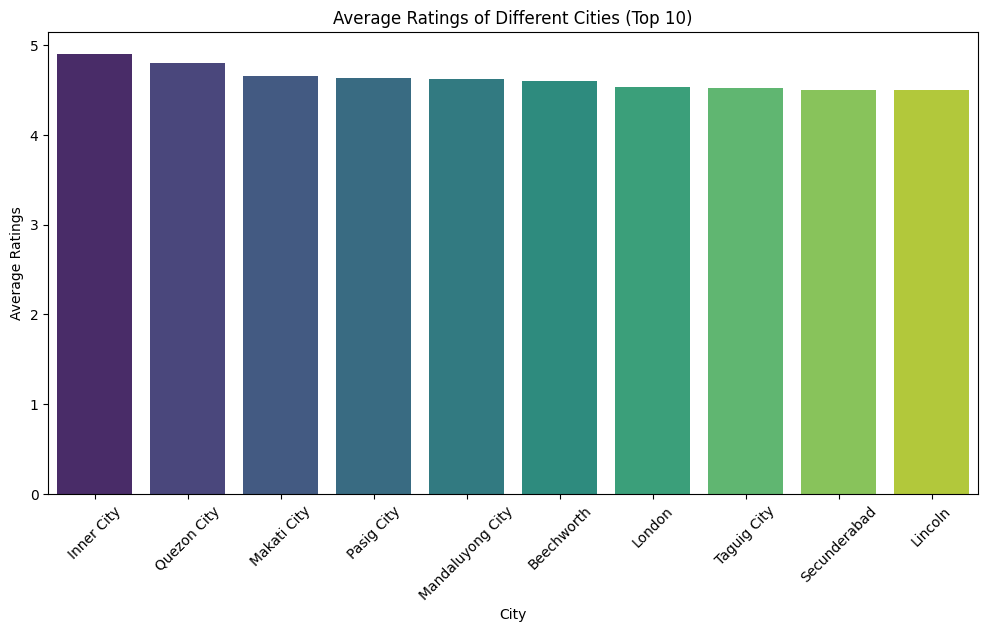

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_rating_by_city.head(10).index, y=average_rating_by_city.head(10).values, palette="viridis")
plt.title("Average Ratings of Different Cities (Top 10)")
plt.xlabel("City")
plt.ylabel("Average Ratings")
plt.xticks(rotation=45)
plt.show()

**Visualize the relationship between various features and the target variable to gain insights.**

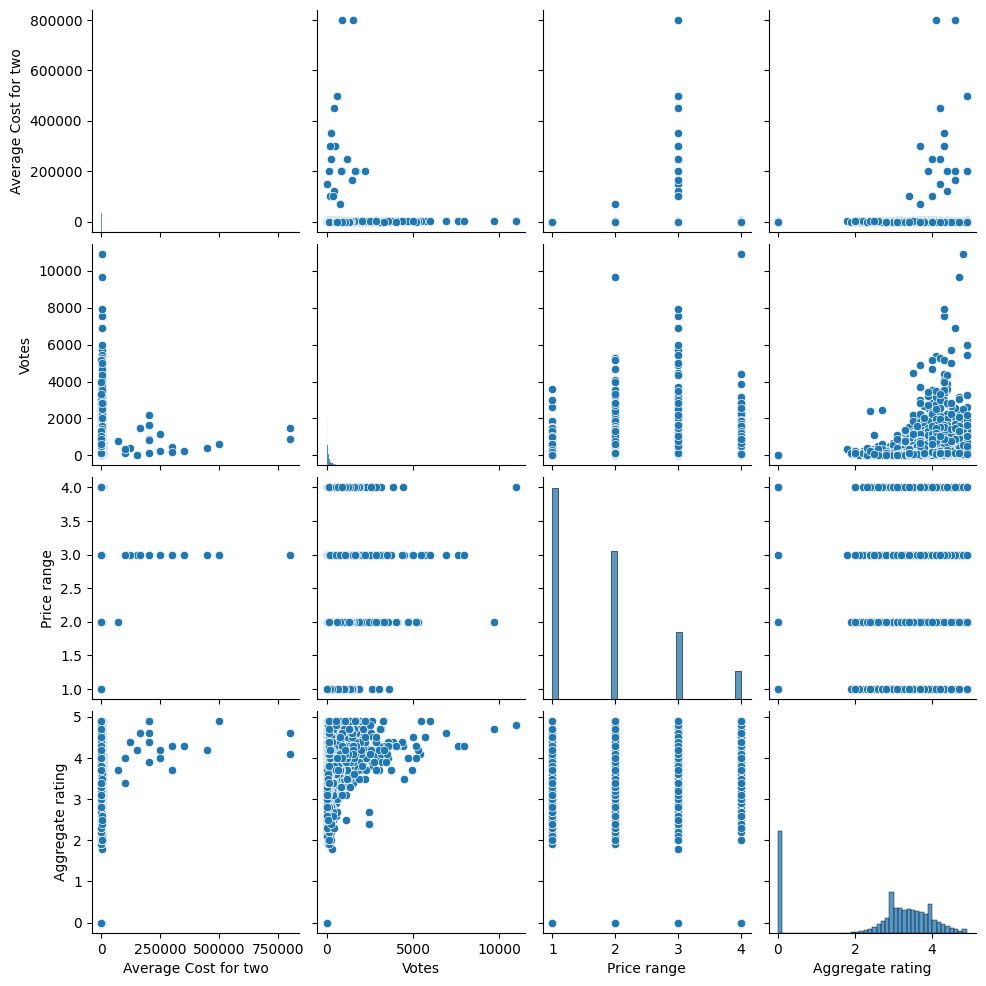

In [9]:
features = ["Average Cost for two", "Votes", "Price range", "Has Table booking", "Has Online delivery", "Aggregate rating"]
sns.pairplot(df1[features])
plt.show()